# MARKING

---

## Marking Scheme:

**70%:**
- [x] Working code up to `y_pos_array` (or equivalent)
- [x] At least some sparse inline comments
**100%:**
- [x] Final value of `g` (converted from pixel space to SI units)
- [x] Very well-commented code
- Either:
    - [x] Use of Markdown Cells
    - [x] Extra task implemented
    
**FINAL GRADE: 100%**

---

## General Comments across all groups:

Very high standard across the groups well done guys! This is especially impressive considering many of you have only 1 term of coding experience. Most groups achieved 70% with a few completing the strict criteria for 100% as listed in the marking scheme above. As many groups had similar scripts, I thought it would be useful to give some stylistic recommendations for your future coding notebooks:

- Use markdown cells to split up the notebook into more manageable chunks, with headers and lines (as used in this markdown cell I wrote)
- Try to put all your import statements in the first cell (numpy, matplotlib etc.)
- Ensure all plots have axes labels and titles

---

## Personal group comments:

- Nice error analysis at the end but i wouldn't be too harsh, a value of g anywhere near `10ms-2` is really impressive well done
- Great use of markdown cells with informative formatting
- Good use of axes labels of plots and nice idea plotting y againts t^2 to make the data linear
- Really impressive notebook, great work!


---

# Using Image Processing to Calculate Acceleration Due to Gravity _g_ for a Falling Object
*by James Vallejo, Dylan Hung, Arnav Aggarwal, Karina Patel*

In this project we calculate a value for the acceleration due to gravity _g_ based on a video of a falling ball. The ball is released from rest and allowed to fall under gravity. We measure how far the ball has fallen in a given timeframe, based on the number of frames elapsed. From here, we then use image processing through python to determine the centre of mass of the ball. This allows us to calculate a value for g by measuring the distance the ball has fallen based on the change in y-position of the centre of mass, and using the previously calculated values.

We start by recording a video of a ball falling from rest. Then we import the video, loading it in as an array. The imported video consists of 50 frames.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # import the image module

cap = cv2.VideoCapture('balldropclip.avi')

frameCount = 50
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

buf = np.zeros((frameCount, frameHeight, frameWidth, 3), np.dtype('int16'))

fc = 0
ret = True

while (fc < 50 and ret):
    ret, buf[fc] = cap.read()
    fc += 1

cap.release()

data = np.mean(buf[:,:,:,:], axis=-1)

print("Data array dimensions:", data.shape)
print("Number of frames:", data.shape[0])

Data array dimensions: (50, 1920, 1080)
Number of frames: 50


Here, we have singled out the frame where the ball is released to look at the starting coordinates of the ball.

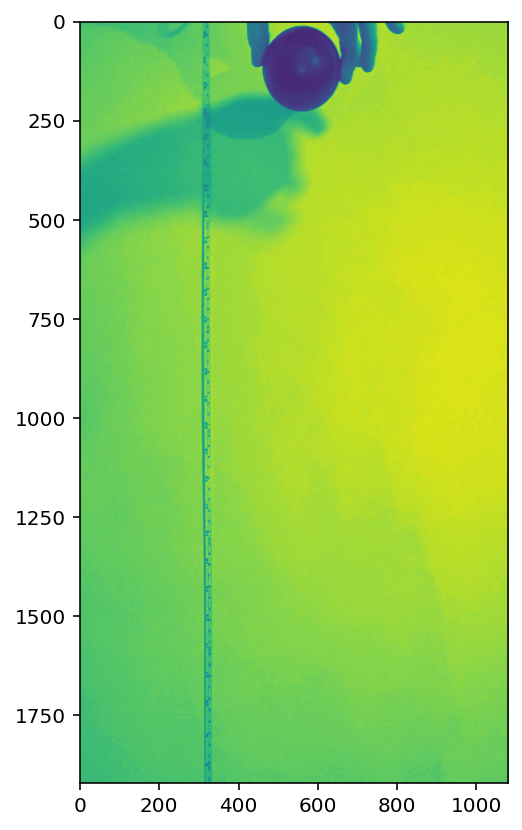

In [2]:
f = data[0,:,:] # extract the first frame

plt.imshow(f)

Now we crop each frame to ensure we are only analysing the relevant area that the ball falls through, and save this data into an array.

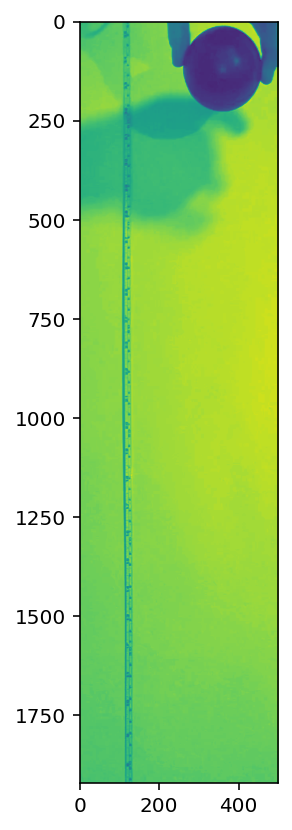

In [3]:
x_min = 200
x_max = 700
y_min = 0
y_max = 1920

f_cropped = data[0, y_min:y_max, x_min:x_max]

# Cropped figure
plt.figure(figsize=(7,7))
plt.imshow(f_cropped)

Here, we are thresholding the image. This converts the image into a format that the programme can comprehend. Essentially the dark and light parts of the image are separated based on a desired brightness sensitivity, which will later allow us to determine a centre of mass of the ball.

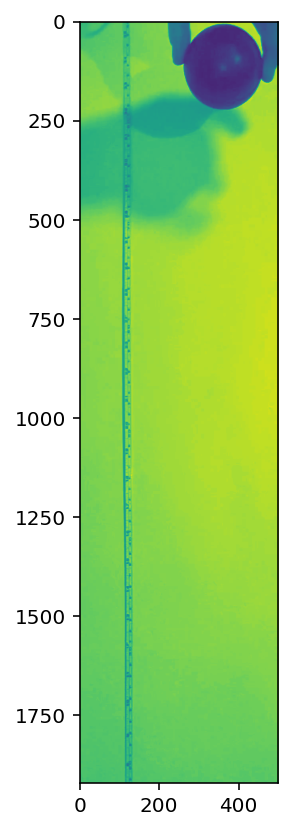

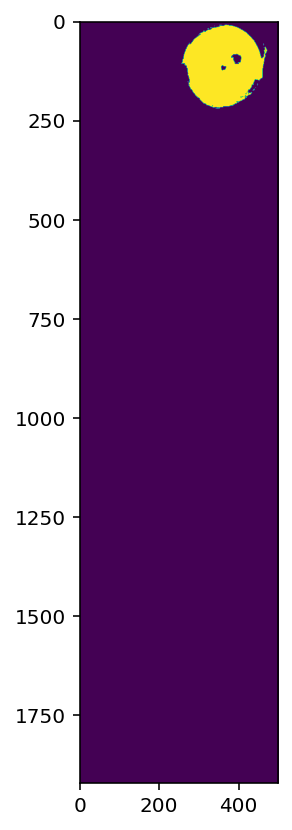

In [4]:
# Threshold value
t = 55

f = data[3, y_min:y_max, x_min:x_max]
plt.figure()
plt.imshow(f)

f_threshold = (f < t).astype(int)
plt.figure()
plt.imshow(f_threshold)

We then import an image processing package in order to use general image processing and analysis functions.

In [5]:
import scipy.ndimage as sn # import the scipy.ndimage package

With scipy.ndimage imported, we can then obtain the x and y coordinates of the largest particle in the image which is the ball.
We did not use the first 3 frames of this video as the ball was not in motion. As a result, only the last 9 frames were used in order to calculate a value for g.

number of blobs: 14
sizes: [3.0824e+04 7.0000e+00 1.0000e+00 7.0000e+00 1.0000e+00 2.0000e+00
 1.0000e+00 4.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 3.0000e+00 1.4000e+01]
index: 0
co-ordinates of largest blob: 357.4609395276408 117.21470282896445
number of blobs: 18
sizes: [3.0733e+04 6.0000e+00 2.0000e+00 5.0000e+00 3.0000e+00 1.0000e+00
 2.0000e+00 1.0000e+00 2.0000e+00 1.0000e+00 1.0000e+00 2.0000e+00
 3.0000e+00 1.0000e+00 1.2000e+01 1.0000e+00 1.0000e+00 9.0000e+00]
index: 0
co-ordinates of largest blob: 357.4756125337585 116.088178830573
number of blobs: 18
sizes: [3.0743e+04 6.0000e+00 2.0000e+00 5.0000e+00 2.0000e+00 5.0000e+00
 2.0000e+00 2.0000e+00 1.0000e+00 2.0000e+00 1.0000e+00 4.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.1000e+01 1.0000e+00]
index: 0
co-ordinates of largest blob: 358.7886998666363 112.29099307159353
number of blobs: 17
sizes: [3.0813e+04 6.0000e+00 1.0000e+00 4.0000e+00 1.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 2.0000e+00 1.0

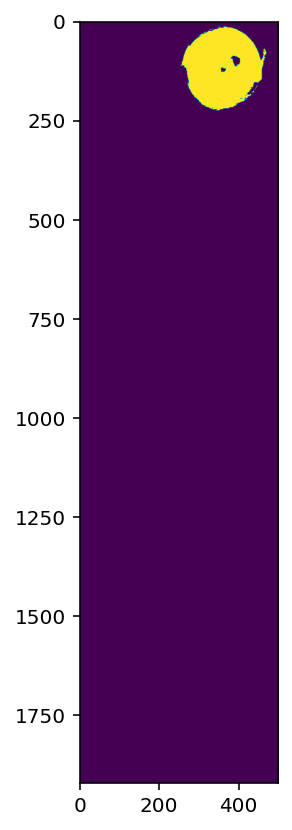

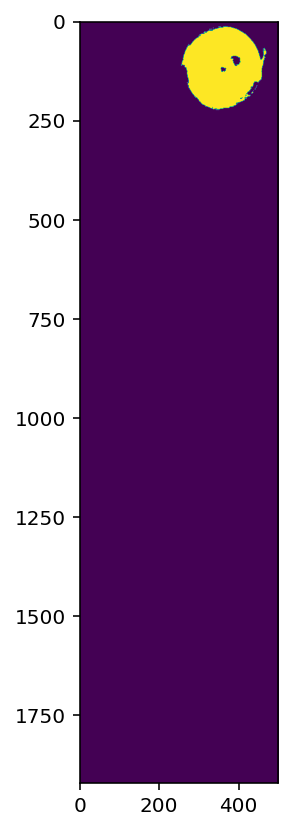

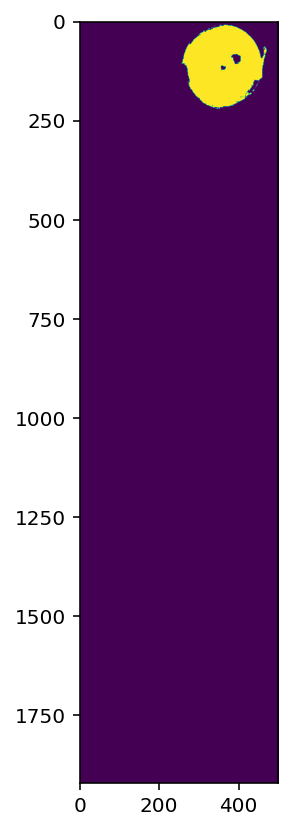

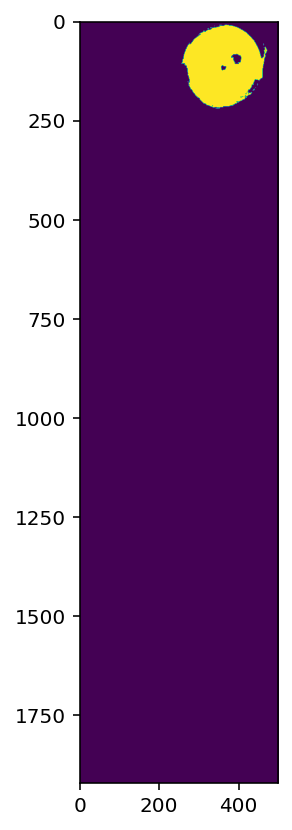

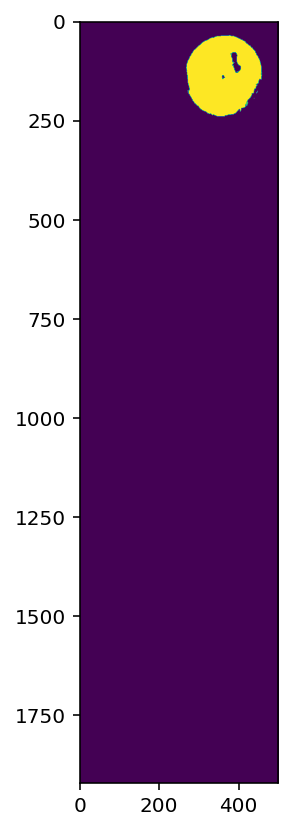

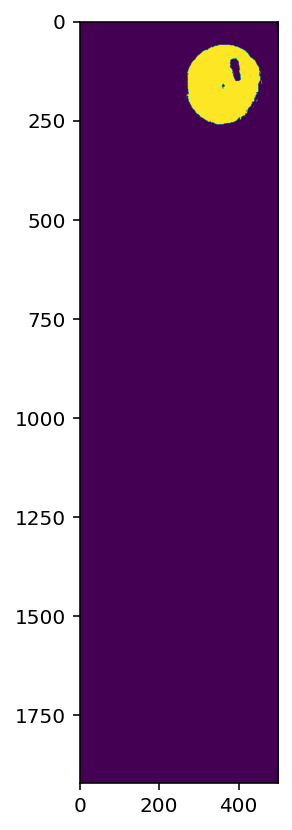

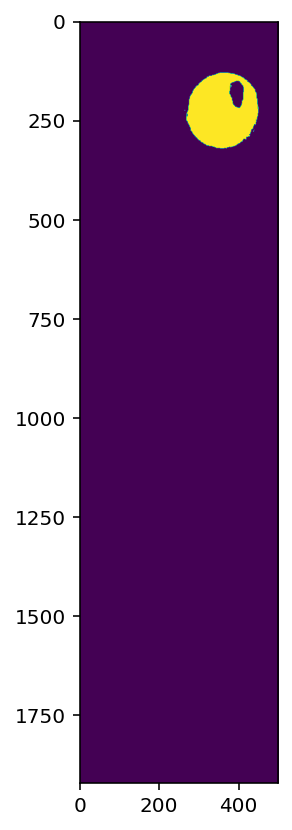

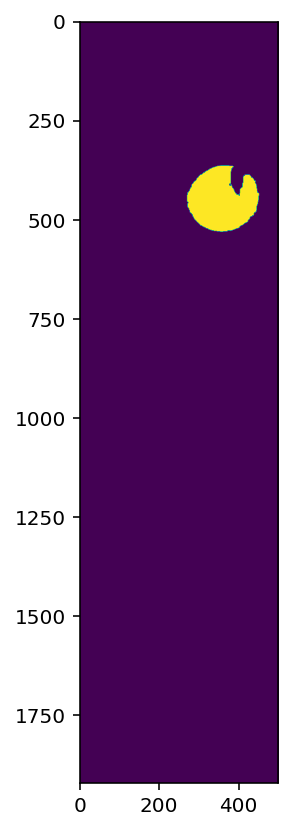

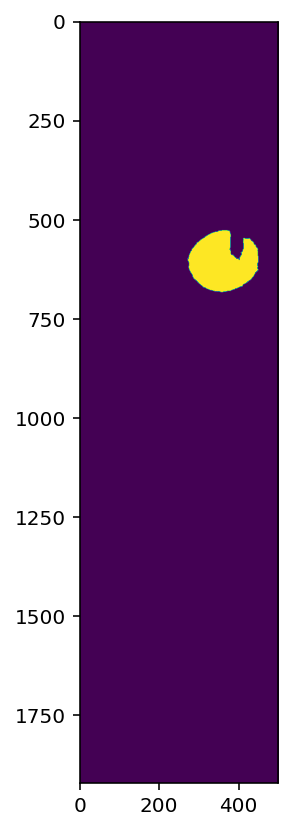

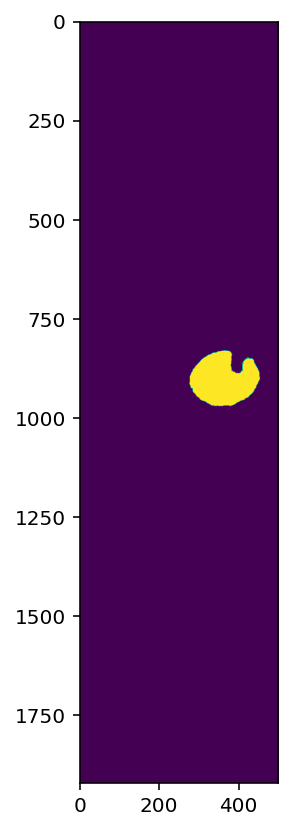

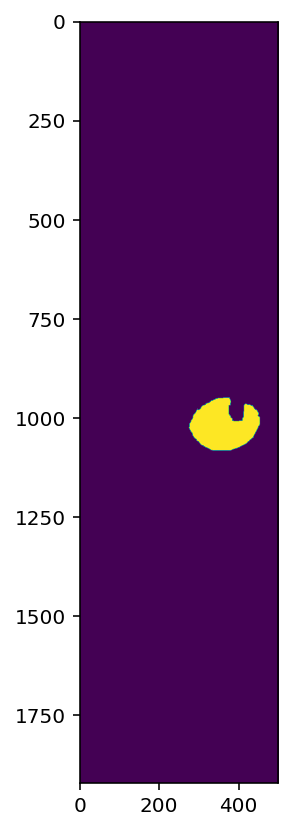

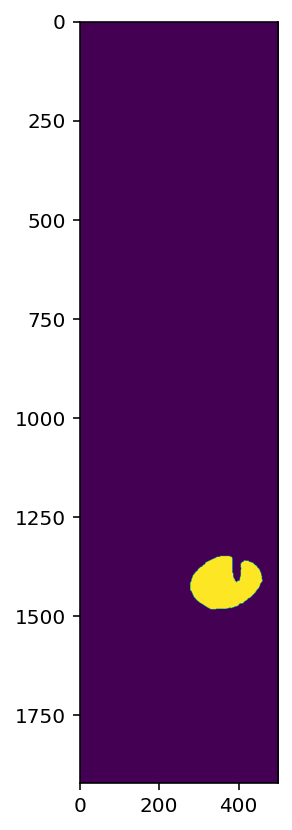

In [6]:
num_frames = 12

# Create arrays for storing blob coordinates
x_pos_array = np.zeros(num_frames)
y_pos_array = np.zeros(num_frames)

for i in range(num_frames):
    
    f = data[i, y_min:y_max, x_min:x_max]
    
    f_threshold = (f < t).astype(int)
    plt.figure()
    plt.imshow(f_threshold)
    
    f_labels, n = sn.label(f_threshold) 
    print("number of blobs:", n)

    sizes = sn.sum(f_threshold, f_labels, range(1, n+1))
    print("sizes:", sizes)

    idx = np.argmax(sizes) 
    print("index:", idx)

    y_pos, x_pos = sn.center_of_mass(f_threshold, f_labels, idx + 1) 
    print("co-ordinates of largest blob:", x_pos, y_pos)
    
    x_pos_array[i] = x_pos
    y_pos_array[i] = y_pos

Here is a graph of the position of the ball. The values in the graph illustrate the centre point of the ball as it falls. Since gravity will only affect the ball vertically, you can see that all the values have the same x co-ordinates (but different y co-ordinates) and thus forms a vertical line.

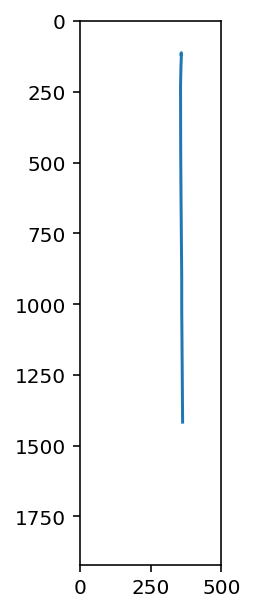

In [7]:
plt.figure(figsize=(5,5))
ax = plt.gca()
 
plt.plot(x_pos_array, y_pos_array)
plt.xlim(0, x_max-x_min)
plt.ylim(0, y_max-y_min)

ax.invert_yaxis()
ax.set_aspect('equal')

In [8]:
y_pos_array = y_pos_array[3:12]

print(y_pos_array)

[ 112.22357447  136.33401271  159.08843488  227.64170571  450.9606222
  608.55700867  903.63881355 1019.65720849 1416.76255064]


In order to calculate a value for g, we will use manually measured values for the distance the ball has fallen in the 9 frames being analysed, according to the centre of mass of the ball.
This can be done accurately because a reference measuring tape was placed on the wall behind the ball in the video. The distance fallen by the ball in 9 frames was calculated as 0.494m. <br>
s = 0.494 m <br>
u = 0 ms<sup>-1</sup><br>
v = ? <br>
a = g ms<sup>-2</sup> <br>
t = 9/30 s <br>
<br>
s = ut + 0.5at^2 <br>
0.494 = (0)(9/30) + (0.5)(g)(9/30)^2 <br>
0.494 = 0.045g <br>
g = 494/45 <br>
g ≈ 10.98 ms<sup>-2</sup>

In [9]:
period = 9/30 # time per frame in seconds

time_array = []
for i in range(y_pos_array.shape[0]):
    time_array.append((i * period)**2)

Here is another graph using the results we have obtained from the experiment. Unlike the first graph however, this graph is not vertical -- the slope of this graph will give us the value for g. (In theory, this graph would have a constant gradient). In the comment below we have explained why it is not possible in practice to use this graph to calculate a value of g using this.

<function matplotlib.pyplot.show(close=None, block=None)>

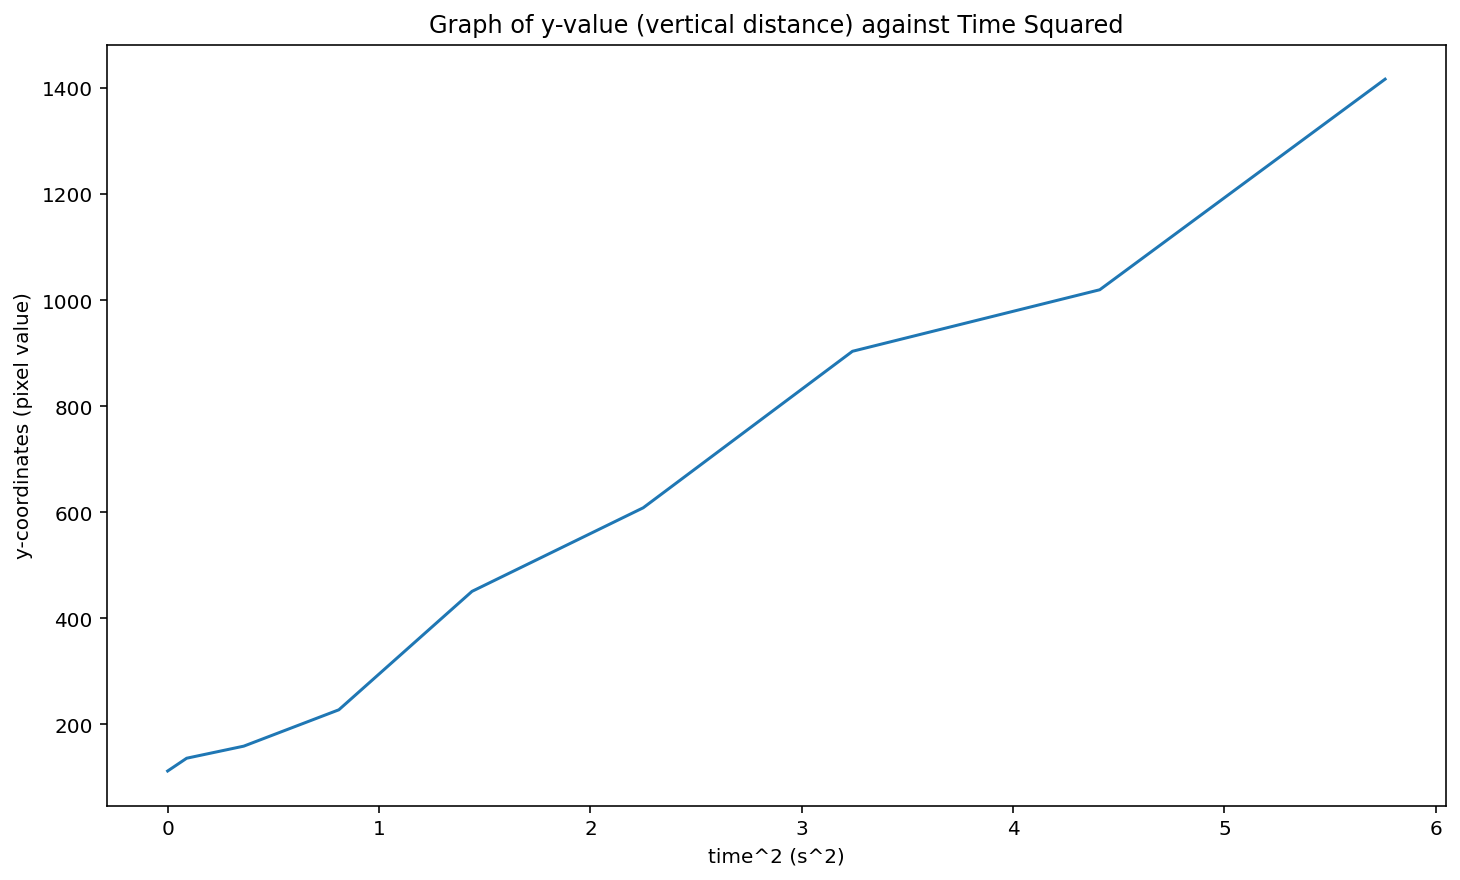

In [10]:
#plot a graph of y position against time squared, should have a slope of g if in metres

plt.plot((time_array), y_pos_array)
plt.xlabel('time^2 (s^2)')
plt.ylabel('y-coordinates (pixel value)')
plt.title('Graph of y-value (vertical distance) against Time Squared')
plt.show

A straight line graph indicates that the method is likely correct, as for a constant acceleration we would expect time<sup>2</sup> to be proportional to the y-coordinates (i.e. distance).
It is worth noting that the graph does not pass through the origin as the starting y-coordinate is not zero, and therefore the y coordinates cannot be treated as the distance travelled by the falling object.
Also, this graph cannot be used to calculate "g" as it stands, as the y coordinates are measured in pixels, not meters as would be necessary (SI units) to calculate an accurate value for "g".
The main purpose of this graph is to ensure a straight line to identify any outliers in the dataset, or a possible error in the methodology or processing of data causing a curved line to form.

# Error Analysis
It is clear that our calculated value (g = 10.98 ms<sup>-2</sup>) does not agree with the actual experimentally deterimined value of 9.81ms<sup>-2</sup>. There are several possible reasons why there is a discrepency of 1.17ms<sup>-2</sup> between the two values. <br>
<br>
The main reason is due to the relatively low number of frames used. The ball is only falling for 9 frames in total. Due to this, there is a high percentage error in the determined time interval that the ball is falling for. For example, if there is an error in this value and the ball was actually falling for 8 frames, this is an 11% difference relative to the actual number of frames. If this value of 8 frames was used in calculations, the value of g would be determined as 13.89ms<sup>-2</sup> using the same method as shown above, resulting in a large error of 26.5% relative to our experimentally deterimined value of 10.98ms<sup>-2</sup>.<br>
<br>
Another possible reason for this error could be due to the way the centre of mass of the ball was determined. As is evident in the above images (12 frames of yellow ball on a purple background), the shape of the ball is not perfectly spherical as would be expected. This is due to patches on the dark ball where the bright ambient light was reflected being registered as the background. Therefore the actual centre of mass of the ball will be slightly innacurate, also causing a slight inaccuracy in the distance travelled by the ball in the given timeframe.

This is quite close approximation for the actual value of _g_ considering the small number of frames used, suggesting that the method used to deterimine this value is likely correct.